# Recurrent neural networks

## Reading data

In [2]:
import numpy as np,tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (10,10)
legend_fontsize = 16

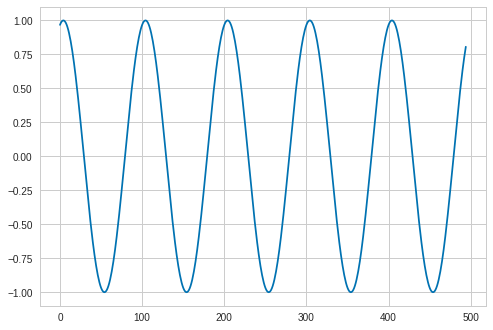

In [3]:
def load_data(filename, seq_len, normalise_window):
    data = [ float(x) for x in open(filename)]

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

x_train, y_train, x_test, y_test = load_data('sinwave.csv', 50, False)
plt.plot(y_test)
plt.show()

In [ ]:
x_train

## Constructing the model

In [5]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers.recurrent import LSTM
from keras.utils import np_utils
from keras import callbacks
from keras import optimizers, regularizers
# tf.python.control_flow_ops = tf

In [6]:
model = Sequential()

model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_dim=1))
model.add(Activation("linear"))

model.compile(loss="mse", optimizer="adam")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, units=50, input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  import sys


In [7]:
model.fit( x_train, y_train, batch_size=512, nb_epoch=10, validation_split=0.05)

/usr/local/lib/python3.5/dist-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 4232 samples, validate on 223 samples
Epoch 1/10
4232/4232 [==============================] - 18s - loss: 0.3109 - val_loss: 0.1440
Epoch 2/10
4232/4232 [==============================] - 9s - loss: 0.0825 - val_loss: 0.0338
Epoch 3/10
4232/4232 [==============================] - 9s - loss: 0.0167 - val_loss: 0.0074
Epoch 4/10
4232/4232 [==============================] - 8s - loss: 0.0094 - val_loss: 0.0016
Epoch 5/10
4232/4232 [==============================] - 9s - loss: 0.0069 - val_loss: 0.0016
Epoch 6/10
4232/4232 [==============================] - 8s - loss: 0.0059 - val_loss: 4.0036e-04
Epoch 7/10
4232/4232 [==============================] - 9s - loss: 0.0053 - val_loss: 3.6133e-04
Epoch 8/10
4232/4232 [==============================] - 9s - loss: 0.0049 - val_loss: 3.1034e-04
Epoch 9/10
4232/4232 [==============================] - 9s - loss: 0.0047 - val_loss: 1.8253e-04
Epoch 10/10
4232/4232 [==============================] - 9s - loss: 0.0044 - val_loss: 1.8488e-04


## Predictions

### Predicting the next point

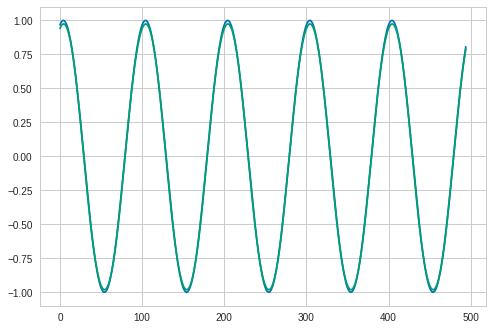

In [8]:
def predict_point_by_point(model, data):
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

predicted = predict_point_by_point(model, x_test)
plt.plot(y_test)
plt.plot(predicted)
plt.show()

### Long-term predictions

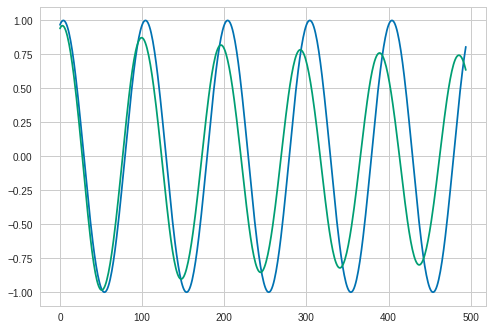

In [9]:
def predict_sequence_full(model, data, window_size):
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

predicted = predict_sequence_full(model, x_test, 50)
plt.plot(y_test)
plt.plot(predicted)
plt.show()

# Let's try something more complicated

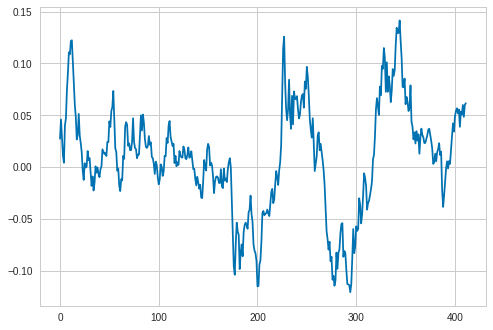

In [10]:
def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

x_train, y_train, x_test, y_test = load_data('sp500.csv', 50, True)
plt.plot(y_test)
plt.show()

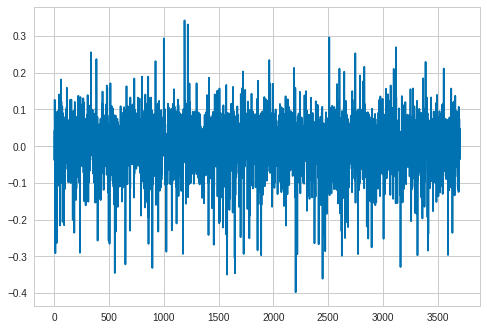

In [11]:
plt.plot(y_train)
plt.show()

In [12]:
model = Sequential()

model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_dim=1))
model.add(Activation("linear"))
# TimeDistributedDense
model.compile(loss="mse", optimizer="adam")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, units=50, input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  import sys


In [17]:
model.fit( x_train, y_train, batch_size=512, nb_epoch=100, validation_split=0.05)

/usr/local/lib/python3.5/dist-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3522 samples, validate on 186 samples
Epoch 1/100
3522/3522 [==============================] - 7s - loss: 2.2893e-04 - val_loss: 1.9697e-04
Epoch 2/100
3522/3522 [==============================] - 7s - loss: 2.1780e-04 - val_loss: 1.9075e-04
Epoch 3/100
3522/3522 [==============================] - 7s - loss: 2.1460e-04 - val_loss: 2.0832e-04
Epoch 4/100
3522/3522 [==============================] - 7s - loss: 2.1542e-04 - val_loss: 1.8925e-04
Epoch 5/100
3522/3522 [==============================] - 7s - loss: 2.0620e-04 - val_loss: 2.0029e-04
Epoch 6/100
3522/3522 [==============================] - 7s - loss: 2.0685e-04 - val_loss: 1.8237e-04
Epoch 7/100
3522/3522 [==============================] - 7s - loss: 2.1341e-04 - val_loss: 1.8421e-04
Epoch 8/100
3522/3522 [==============================] - 7s - loss: 2.1256e-04 - val_loss: 1.8105e-04
Epoch 9/100
3522/3522 [==============================] - 7s - loss: 1.9932e-04 - val_loss: 1.8424e-04
Epoch 10/100
3522/3522 [===========

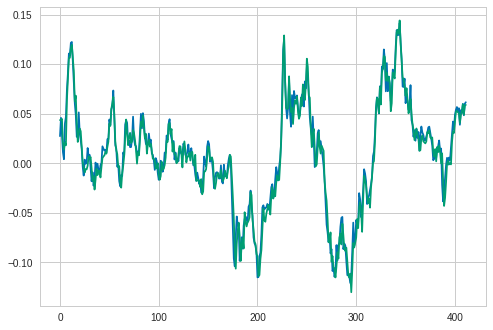

In [18]:
predicted = predict_point_by_point(model, x_test)
plt.plot(y_test)
plt.plot(predicted)
plt.show()

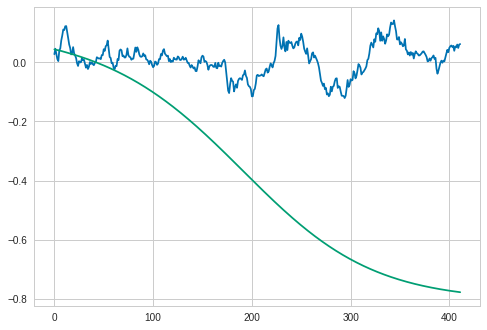

In [19]:
predicted = predict_sequence_full(model, x_test, 50)
plt.plot(y_test)
plt.plot(predicted)
plt.show()

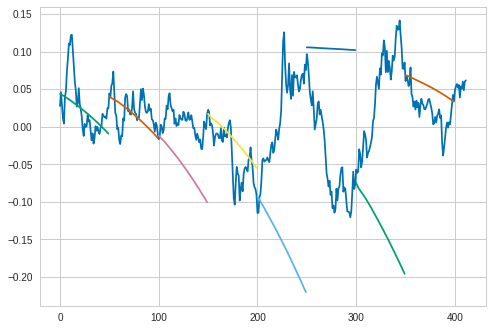

In [20]:
def predict_sequences_multiple(model, data, window_size, prediction_len):
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

predicted = predict_sequences_multiple(model, x_test, 50, 50)
plt.plot(y_test)
for i, data in enumerate(predicted):
    padding = [None for p in range(i * 50)]
    plt.plot(padding + data)
plt.show()